# Laboratorio # 2: Multi Layer Perceptron
## INTEGRANTES

Giovani Santos - 22523

Hugo Rivas - 22500


In [5]:
import numpy as np
import altair as alt 
import pandas as pd

In [6]:
def init_parameters(n_features, n_neurons, n_output): 

    np.random.seed(100)
    W1 = np.random.uniform(size = (n_features, n_neurons))
    b1 = np.random.uniform(size = (1, n_neurons))

    W2 = np.random.uniform(size = (n_neurons, n_output))
    b2 = np.random.uniform(size = (1, n_output))

    return {
        "W1" : W1 
        , "b1" : b1 
        , "W2" : W2
        , "b2" : b2 
    }

In [7]:
def linear_function(W, X, b): 
    return (X @ W)+ b 

In [8]:
def sigmoid_func(Z): 
    return 1 / (1 + np.exp(-Z))

In [9]:
def cost_function(y_true, y_pred):
    """
    Entropía cruzada binaria:
    J = -1/m * Σ [ y_true*log(y_pred) + (1 - y_true)*log(1 - y_pred) ]
    """
    m = y_true.shape[0]
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    loss = - (1/m) * np.sum(
        y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)
    )
    return loss


In [10]:
def predict(X, W1, W2, b1, b2): 
    Z1 = linear_function(W1, X, b1)
    S1 = sigmoid_func(Z1)
    Z2 = linear_function(W2, S1, b2)
    S2 = sigmoid_func(Z2)
    return np.where(S2 >= 0.5, 1, 0)

In [11]:
import numpy as np

def fit(X, y, n_features=2, n_neurons=3, n_output=1, iterations=10, eta=0.001):
    params = init_parameters(
        n_features=n_features,
        n_neurons=n_neurons,
        n_output=n_output
    )

    errors = []
    m = X.shape[0]  

    for _ in range(iterations):
        Z1 = linear_function(params['W1'], X, params['b1'])
        S1 = sigmoid_func(Z1)
        Z2 = linear_function(params['W2'], S1, params['b2'])
        S2 = sigmoid_func(Z2)  # y_pred

        loss = cost_function(y, S2)
        errors.append(loss)

    
        delta2 = S2 - y
        dW2 = (S1.T @ delta2) / m
        db2 = np.sum(delta2, axis=0, keepdims=True) / m

        delta1 = (delta2 @ params['W2'].T) * S1 * (1 - S1)
        dW1 = (X.T @ delta1) / m
        db1 = np.sum(delta1, axis=0, keepdims=True) / m

        params['W2'] -= eta * dW2
        params['b2'] -= eta * db2
        params['W1'] -= eta * dW1
        params['b1'] -= eta * db1

    return errors, params


In [12]:
y = np.array([[0, 1, 1, 0]]).T 
X = np.array([[0, 0, 1, 1]
              ,[0, 1, 0, 1]]).T 

In [13]:
errors, params = fit(X, y, iterations=5000, eta = 0.1)

In [14]:
y_pred = predict(X, params["W1"], params["W2"], params["b1"], params["b2"])
num_correct_predictions = (y_pred == y).sum()
accuracy = (num_correct_predictions / y.shape[0]) * 100
print('Multi-layer perceptron accuracy: %.2f%%' % accuracy)


Multi-layer perceptron accuracy: 100.00%


In [15]:
alt.data_transformers.disable_max_rows()
df = pd.DataFrame({"errors":errors, "time-step": np.arange(0, len(errors))})
alt.Chart(df).mark_line().encode(x="time-step", y="errors").properties(title='Chart 2')


alt.Chart(...)

# Mismo Dataset en Framework Pytorch

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import altair as alt
import matplotlib as plt

Text(0, 0.5, 'Pérdida (BCE)')

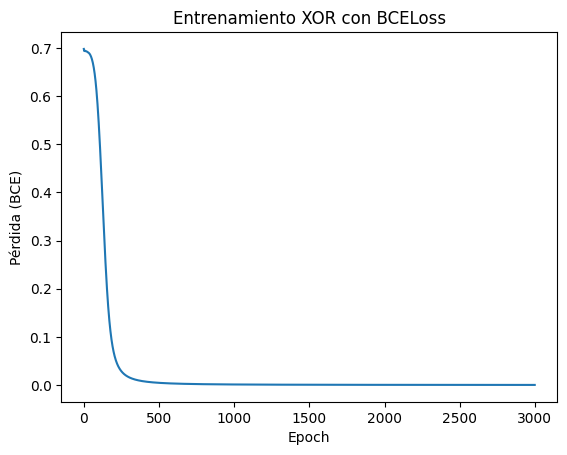

In [19]:


# Inputs: XOR problem
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]]).T  # Shape (4, 2)
y = np.array([[0, 1, 1, 0]]).T  # Shape (4, 1)

# Convert to torch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Define the model
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

model = SimpleNet()

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
errors = []
epochs = 3000

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()
    errors.append(loss.item())

# Convertir errores a DataFrame
df2 = pd.DataFrame({
    "epoch": np.arange(epochs),
    "loss": errors
})

# Graficar con pandas
ax = df2.plot(x="epoch", y="loss", legend=False, title="Entrenamiento XOR con BCELoss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Pérdida (BCE)")


1. ¿Existen cambios de arquitectura en las 2 redes implementadas?
- Se pueden observar cambios entre ambas redes. En la primera red realizada, se observa que la capa oculta tiene 3 neuronas y la arquitectura es 2 -> 3 -> 1. Además, tiene un total de 13 parámetros. Por otro lado, la red realizada con PyTorch tiene una capa oculta de 16 neuronas, una arquitectura 2 -> 16 -> 1 y un total de 65 parámetros. 
2. ¿Exiten diferencias en la velocidad de convergencia entre las 2 redes?
- Se puede notar que la velocidad de convergencia de la red con PyTorch es mayor que la primera. Se observa que la primera red tiene un descenso lento y constante a diferencia del descenso exponencial de la red PyTorch. Por otro lado, se observa que la primera red necesita más permutaciones que la de PyTorch para alcanzar la perdida baja. Esto se debe a factores como su arquitectura con mayor cantidad de neuronas y el learning rate diferente.
3. En la función init_parameters, ¿qué sucede si inicializamos los pesos en 0 en
lugar de valores aleatorios? ¿y los bias? 
- Si se incializan los pesos en 0, se tiene un problema relacionado con un comportamiento a un perceptrón simple, en donde la red no puede aprender patrones complejos debido a que las neuronas de las capas tendrían los mismos gradientes. Si se inicializan los bias en 0, se causa una convergencia más lenta en donde se tiene un entrenamiento menos eficiente.    